# Zummit Infolabs Bangalore
## Project 2 :- Inteligent Recruitment System
1. Resume Phrasing
2. Question and Answers Generation
3. Chatbot
4. Model Integration & Deployment in production

## Step:-1 - Data Extraction and Data Cleaning

In [1]:
#import Library -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#Load the Dataet -
import requests
API_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
response_API = requests.get('https://gmail.googleapis.com/$discovery/rest?version=v1',API_KEY)
print(response_API.status_code)
df = response_API

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


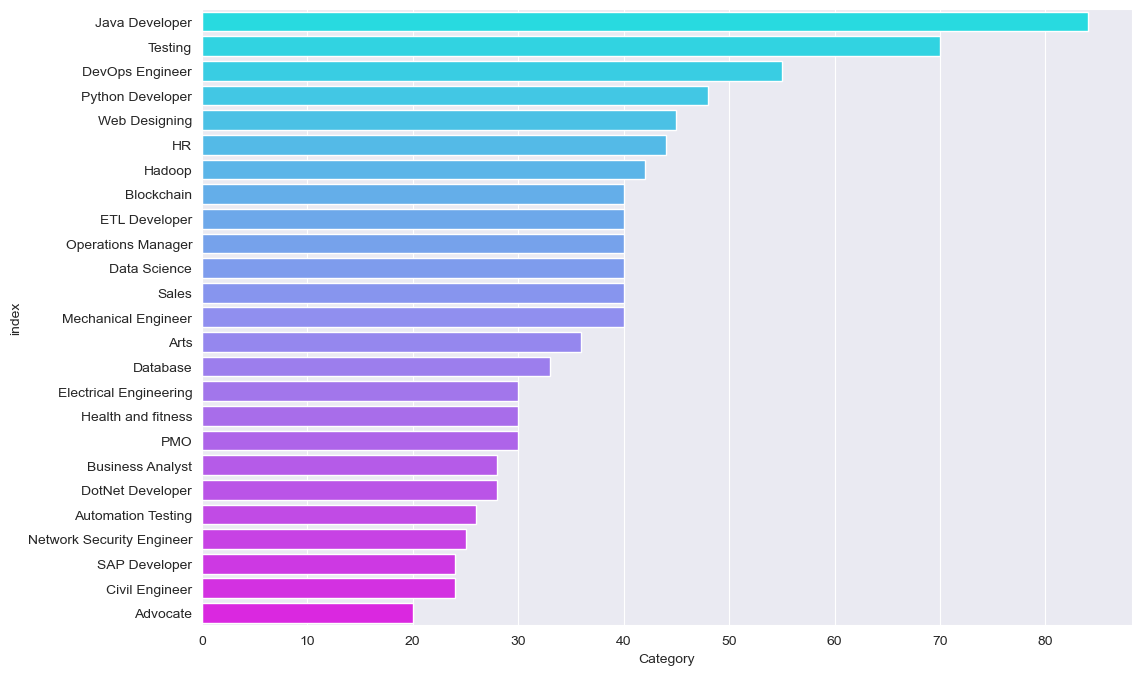

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

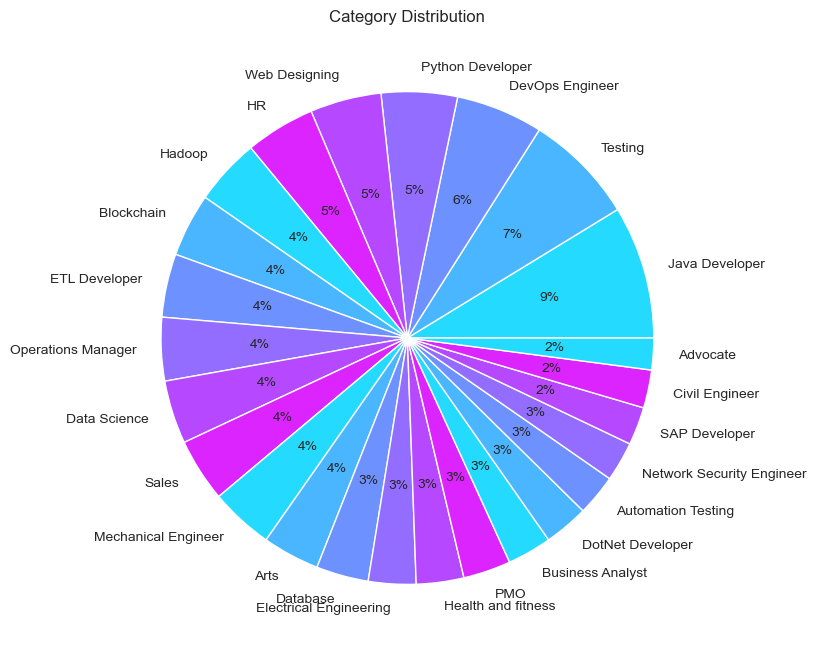

In [8]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [9]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [10]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [14]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [15]:
# Now encode the data
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

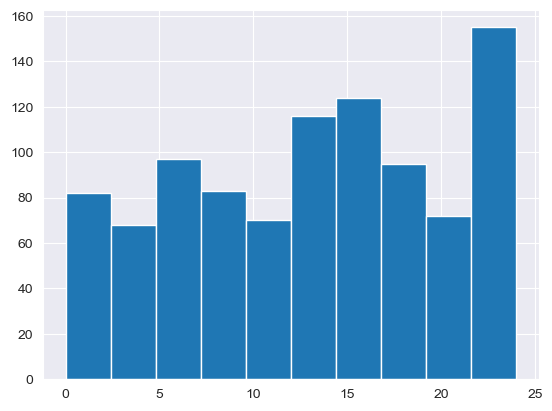

In [16]:
plt.hist(df['new_Category'])

In [17]:
# Vectorizing the cleaned columns
text = df['cleaned'].values
target = df['new_Category'].values
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
tfidf.fit(text)
WordFeatures = tfidf.transform(text)

In [18]:
#Save Scaling/Encoding File -
joblib.dump(tfidf,"ResumeFraserModelEncoding.pkl")

['ResumeFraserModelEncoding.pkl']

In [19]:
WordFeatures.shape

(962, 1500)

In [20]:
WordFeatures

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 113017 stored elements in Compressed Sparse Row format>

In [21]:
target

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

# Step:- 2 - Feature Selection

In [22]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

# Step:- 3 - Model Selection

In [24]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [25]:
#Save the Model -
joblib.dump(model,"ResumePhrasingModel.pkl")

['ResumePhrasingModel.pkl']

# Step:- 4 - Model Prediction

In [26]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([22, 10, 16,  1,  6, 15, 10,  9,  6,  1, 11,  1, 22, 23, 24, 12, 21,
       23, 24, 10, 24, 22, 22,  5, 10, 18,  2, 23, 20, 17,  0, 20, 13, 22,
       15, 11, 23, 14, 20, 20,  4,  3, 15, 18, 23,  4,  1, 15, 23, 18, 15,
        9, 21, 14, 11, 16, 20, 19, 18, 11,  5,  8, 19,  1, 10, 16, 11, 21,
        5, 16, 23,  1,  1, 15, 24,  4, 17,  7, 20,  3, 21, 23, 10, 23, 15,
       10, 23,  7,  8, 23,  8, 14, 14,  6, 18, 17, 23, 10, 13, 15, 22, 15,
       18, 20,  3,  9, 12,  8, 16, 11,  8, 24, 18, 21, 11, 15,  9, 15, 13,
       16, 12,  8, 15,  8, 24, 13, 14, 12,  7, 19, 14, 12, 16,  9, 19, 10,
       11,  3,  8, 15, 22, 19, 15, 23,  3, 17,  2,  2, 14, 19,  8, 20, 11,
       12,  7, 19, 22, 13, 24,  3, 24,  9, 14,  3, 10,  1, 19, 22, 13, 15,
       17,  0, 18, 15,  6, 21, 24, 20, 17,  8,  3, 11,  4,  2,  7, 20,  7,
        3, 20,  0,  1, 21, 24])

# Step:- 5 - Model Evaluation

In [27]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [28]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

#4. To learn the top keywords to analyze.

In [29]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [30]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [31]:
  import nltk
  nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [34]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


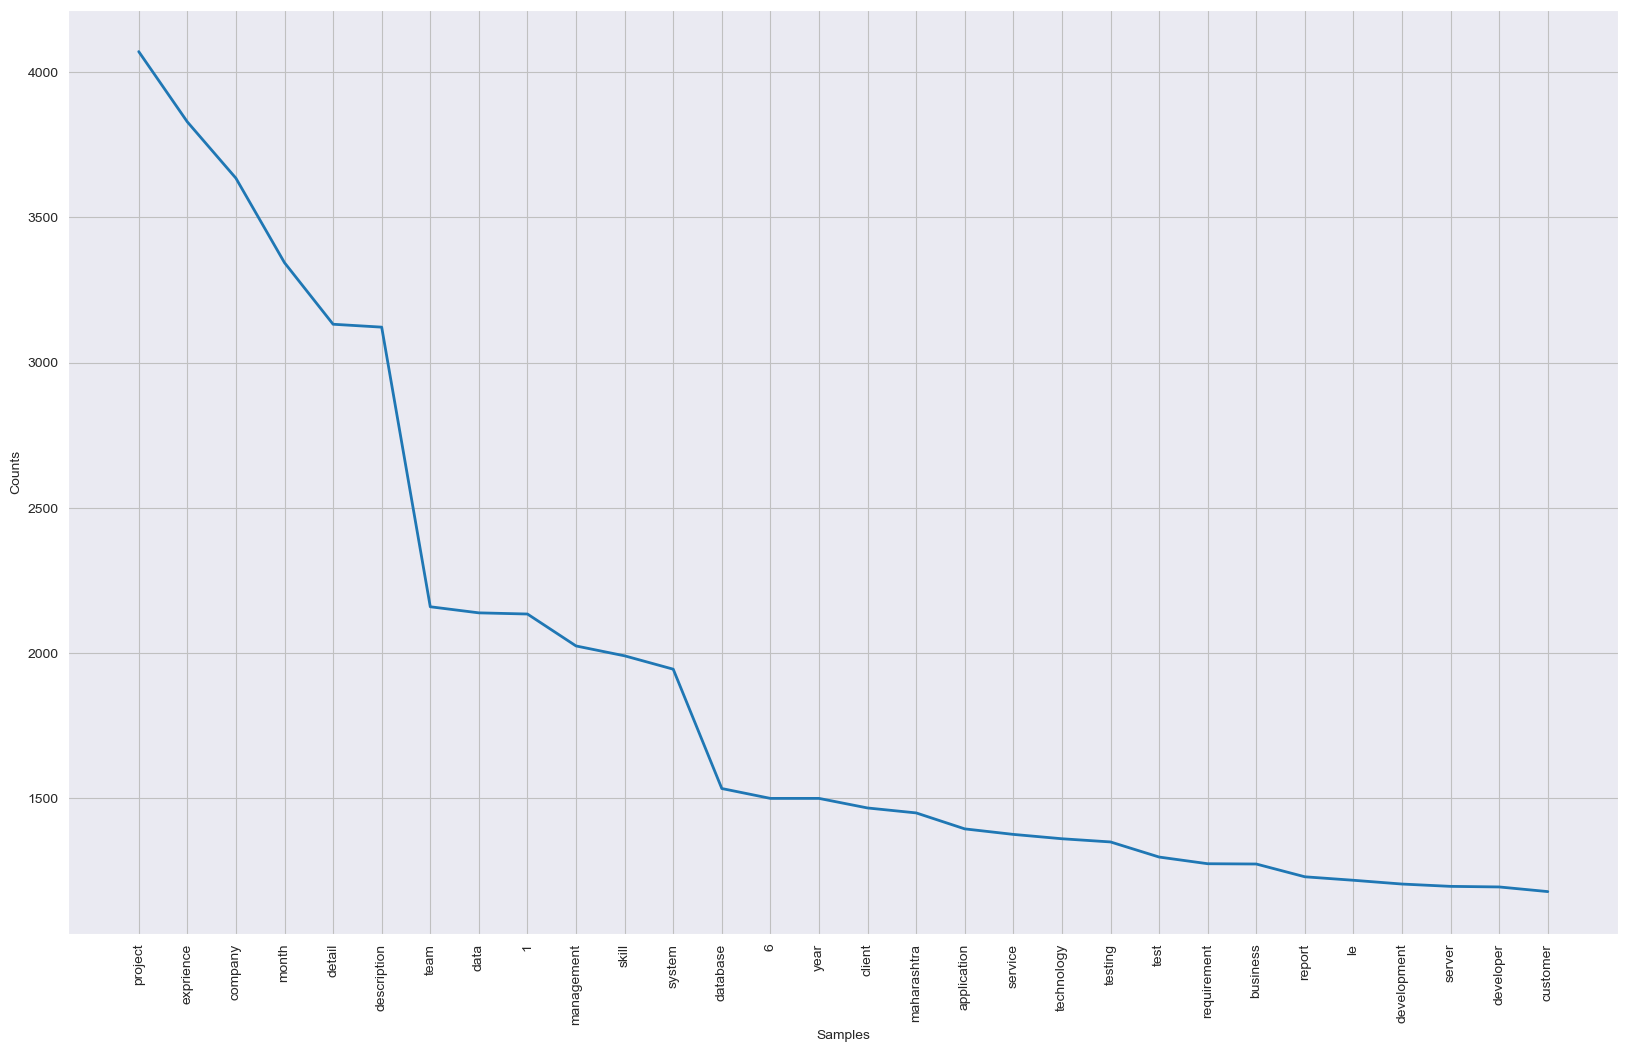

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [36]:
# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

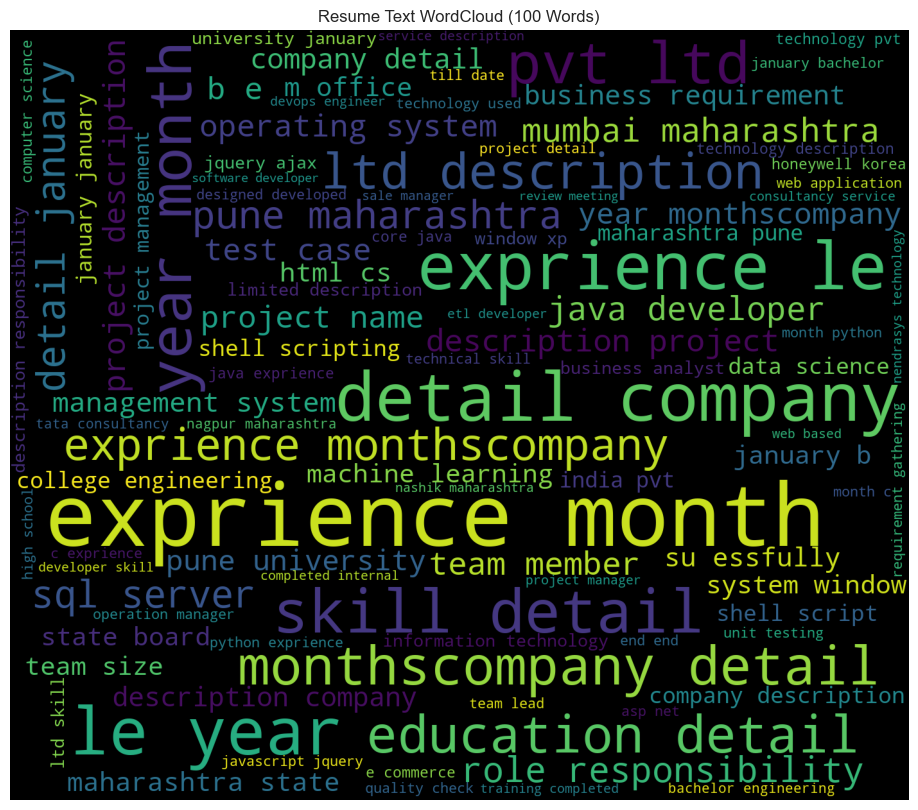

In [37]:
#World Cloud -
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

# Step:- 6 - Model Prediction on Production/Real Data 
1. Processflow for End User to Pass the Inputs to ML Model - 
2. Enter Your Resume as a Input in Text Format
3. You Will receive the Results

In [38]:
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [39]:
#Sample data -
df["cleaned"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [40]:
#Encoding Format -
df[["Category","new_Category"]].value_counts()

Category                   new_Category
Java Developer             15              84
Testing                    23              70
DevOps Engineer            8               55
Python Developer           20              48
Web Designing              24              45
HR                         12              44
Hadoop                     13              42
Data Science               6               40
Operations Manager         18              40
Sales                      22              40
Blockchain                 3               40
ETL Developer              10              40
Mechanical Engineer        16              40
Arts                       1               36
Database                   7               33
Electrical Engineering     11              30
Health and fitness         14              30
PMO                        19              30
Business Analyst           4               28
DotNet Developer           9               28
Automation Testing         2            

In [41]:
#Prediction on User Input -
resume = input("Type/Enter/Paste Your Resume Here in Text Format: \n")
prediction = model.predict(tfidf.transform([resume]))
print("-----------------------------------------------------------------------------------------------------------------------")
position = input("Job Application for Position: ").capitalize()
print("-----------------------------------------------------------------------------------------------------------------------")
try:   
    if prediction == 15:
        print("Congratulations Your resume is got selected for !! Java Developer !! Profile. Stage-1")
    if prediction == 23: 
        print("Congratulations Your resume is got selected for !! Selenium Testing !! Profile. Stage-1")
    if prediction == 8:
        print("Congratulations Your resume is got selected for !! DevOps Engineer !! Profile. Stage-1")
    if prediction == 20:
        print("Congratulations Your resume is got selected for !! Python Developer !! Profile. Stage-1")
    if prediction == 24:
        print("Congratulations Your resume is got selected for !! Web Designing !! Profile. Stage-1")
    if prediction == 12:
        print("Congratulations Your resume is got selected for !! Human Resource !! Profile. Stage-1")
    if prediction == 13:
        print("Congratulations Your resume is got selected for !! Hadoop !! Profile. Stage-1")
    if prediction == 18:
        print("Congratulations Your resume is got selected for !! Operations Manager !! Profile. Stage-1")
    if prediction == 6:
        print("Congratulations Your resume is got selected for !! Data Science !! Profile. Stage-1")
    if prediction == 22:
        print("Congratulations Your resume is got selected for !! Sales !! Profile. Stage-1")
    if prediction == 3:
        print("Congratulations Your resume is got selected for !! Block Chain !! Profile. Stage-1")
    if prediction == 10:
        print("Congratulations Your resume is got selected for !! ETL Developer !! Profile. Stage-1")
    if prediction == 16:
        print("Congratulations Your resume is got selected for !! Mechanical Engineer !! Profile. Stage-1")
    if prediction == 1:
        print("Congratulations Your resume is got selected for !! Arts Professional !! Profile. Stage-1")
    if prediction == 7:
        print("Congratulations Your resume is got selected for !! Database Engineer !! Profile. Stage-1")
    if prediction == 11:
        print("Congratulations Your resume is got selected for !! Electrical Engineer !! Profile. Stage-1")
    if prediction == 14:
        print("Congratulations Your resume is got selected for !! Health and fitness !! Profile. Stage-1")
    if prediction == 19:
        print("Congratulations Your resume is got selected for !! PMO !! Profile. Stage-1")
    if prediction == 4:
        print("Congratulations Your resume is got selected for !! Business/Data Analyst !! Profile. Stage-1")
    if prediction == 9:
        print("Congratulations Your resume is got selected for !! DotNet Developer !! Profile. Stage-1")
    if prediction == 2:
        print("Congratulations Your resume is got selected for !! Automation Testing !! Profile. Stage-1")
    if prediction == 17:
        print("Congratulations Your resume is got selected for !! Network Security Engineer !! Profile. Stage-1")
    if prediction == 21:
        print("Congratulations Your resume is got selected for !! SAP Developer !! Profile. Stage-1")
    if prediction == 5:
        print("Congratulations Your resume is got selected for !! Civil Engineer !! Profile. Stage-1")
    if prediction == 0:
        print("Congratulations Your resume is got selected for !! Advocate !! Profile. Stage-1")
except:
    print("Sorry!!! Your Application is got Rejected.")
finally:
    print("-----------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------->>Final Result<<-----------------------------------------------------------")
    print("Please Note That: \n If the Position that you applied for and the Model Predicted Position is Same then & then only You are Selected for Next Stage of Recruitment. \n Else Please Note that Your Application is Rejected")
    print("-----------------------------------------------------------------------------------------------------------------------")


Type/Enter/Paste Your Resume Here in Text Format: 
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Tech

# Step:- 7 - Model Deployment

# Thank You...